Source:
https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1

Recall our standard Gradient Descent (aka batch) algorithm:
![image.png](images/sgd1.png)
In the above algorithm says, to perform the GD, we need to calculate the gradient of the cost function J. And to calculate the gradient of the cost function, we need to sum (yellow circle!) the cost of each sample. If we have 3 million samples, we have to loop through 3 million times or use the dot product.

Another downside of standard gradient descent is you have no guarantee that you will converge to the absolute minimum.

An algorithm that will be faster (and has a higher likelihood of converging to the true minimum) is stochastic gradient descent, in which we introduce some randomness:
![image.png](images/sgd2.png)
Basically, in SGD, we are using the cost gradient of 1 example at each iteration, instead of using the sum of the cost gradient of ALL examples.

A few things to note:

a) In SGD, before for-looping, you need to randomly shuffle the training examples.

b) In SGD, because it’s using only one example at a time, its path to the minima is noisier (more random) than that of the batch gradient. But it’s ok as we are indifferent to the path, as long as it gives us the minimum AND the shorter training time. Here’s a picture to view the difference:
![image.png](images/sgd3.png)
Or in 3 D:![image.png](images/sgd4.png)

c) Mini-batch gradient descent uses n data points (instead of 1 sample in SGD) at each iteration.

Some pandas notes to help:
1.	To shuffle the dataframe and reset the index:

```
df = df.sample(frac=1).reset_index(drop=True)
```

2.	To randomly select one row from an entire dataframe, use:

```
df.sample() 
```

Or, to randomly select an integer between 0 and n, inclusive, put “import random” in your list of important packages and then type: 
```
random.randint(0,n)
```

### Exercise 1:
Get the SGD algorithm working. To test it, an input of sgd(X,Y,.01,0.00001) gave me out an output of b:86.84622507560407, m:-1.9109285548469945, (although yours will be different due to the randomization).

### Exercise 2: 
Once you have the algorithm working, create a 2D (alpha0, alpha1) plot of both the GD and SGD algorithms. You will see the SGD algorithm take a more meandering path. To speed up the plotting, you will probably only want to plot every 100th point. (You can do this by creating a separate j counting variable and only plot the point if j % 100 == 0.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import random

df = pd.read_csv('data/airlines.csv')
df.head()

df = df.sample(frac=1).reset_index(drop=True)
y = df['Percentage On Time Arrivals']
X = df['Mishandled baggage (per 1000 passengers)']


def f(x,m,b):                                                         #Defining the function of f
     return m*x + b                                                   #Setting the function that is being defined

k = len(X)                                                            #Defines the number of values in the X data set
def sgd(X, y, alpha, tol):
    temp1, temp0 = 1,1                                                #Temporary Variables
    theta1, theta0 = 0,0                                              #Initial guesses for m and b 

    while ((temp0 - theta0)**2 + (temp1 - theta1)**2)**(1/2) > tol:   #Ensures that the loop is defined within the tolerance value 
        temp1, temp0 = theta1, theta0                                 #Keeps track of what is old and what is updated
        deriv0, deriv1 = 0, 0                                         #Resets the for loop
        
        m = random.randint(0, len(X)-1)  
        
        deriv1 = ((f(X[m], theta1, theta0) - y[m])) * X[m]
        deriv0 = (f(X[m], theta1, theta0) - y[m])
            
        theta1 = theta1 - (alpha * deriv1)/k
        theta0 = theta0 - (alpha * deriv0)/k
        
    print(theta0, theta1)
        
sgd(X, y, 0.01,0.00001)

26.138594404769286 7.66069396974057


In [29]:
print(df.sample())
i = random.randint(0, len(X))


    Airline  Mishandled baggage (per 1000 passengers)  \
1  American                                       6.5   

   Percentage On Time Arrivals  
1                         73.1  


-2.1611603661172683 87.14754155439583


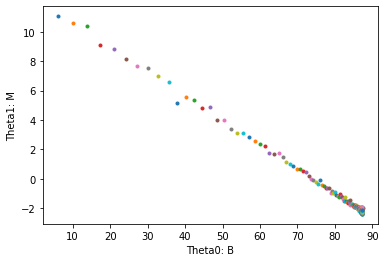

In [86]:
deriv1 = 0
deriv0 = 0
theta1 = 0
theta0 = 0
temp0 = 1
temp1 = 1
tol = 0.00000001
alpha = 0.01
counter = 0

while ((temp0 - theta0)**2 + (temp1 - theta1)**2)**(1/2) > tol:
    temp1, temp0 = theta1, theta0                                 #Keeps track of what is old and what is updated
    deriv0, deriv1 = 0, 0                                         #Resets the for loop
    
    m = random.randint(0, len(X)-1)          
    deriv1 = ((f(X[m], theta1, theta0) - y[m])) * X[m]
    deriv0 = (f(X[m], theta1, theta0) - y[m])
    
    theta1 = theta1 - (alpha * deriv1)/k
    theta0 = theta0 - (alpha * deriv0)/k
    
    counter += 1
    if counter % 1000 == 0:
        plt.plot(theta0, theta1, '.')
        plt.xlabel('Theta0: B')
        plt.ylabel('Theta1: M')

    
print(theta1, theta0)